In [1]:
%pip install matplotlib tqdm

import matplotlib.pyplot as plt
import preprocess as pp
import torch
from write_data import write_data
from train import train_network

            .-:/++oooo++/:-.
        `:/oooooooooooooooooo/-`
      -/oooooooooooooooooooo+ooo/-
    .+oooooooooooooooooo+/-`.ooooo+.
   :oooooooooooo+//:://++:. .ooooooo:
  /oooooooooo+o:`.----.``./+/oooooooo/
 /ooooooooo+. +ooooooooo+:``/ooooooooo/
.ooooooooo: .+ooooooooooooo- -ooooooooo.
/oooooo/o+ .ooooooo:`+oo+ooo- :oooooooo/
ooo+:. .o: :ooooo:` .+/. ./o+:/ooooooooo
oooo/-`.o: :ooo/` `/+.     ./.:ooooooooo
/oooooo+o+``++. `:+-          /oooooooo/
.ooooooooo/``  -+:`          :ooooooooo.
 /ooooooooo+--+/`          .+ooooooooo/
  /ooooooooooo+.`      `.:++:oooooooo/
   :oooooooooooooo++++oo+-` .ooooooo:
    .+ooooooooooooooooooo+:..ooooo+.
      -/oooooooooooooooooooooooo/-
        `-/oooooooooooooooooo/:`
            .-:/++oooo++/:-.
agherasie@agherasie-Predator-PH315-52 
------------------------------------- 
OS: Ubuntu Cinnamon 22.04 LTS x86_64 
Host: Predator PH315-52 V1.04 
Kernel: 5.15.0-39-generic 
Uptime: 1 hour, 24 mins 
Packages: 2678 (dpkg), 11 (snap) 
Shell: fish 3.3.1 


/home/agherasie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


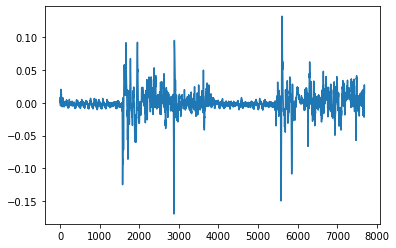

In [2]:
import numpy as np

train_set = pp.convert_dataset("../data/Focus.csv")
mean_values = pp.get_mean_values(train_set)
plt.plot(mean_values)
plt.show()

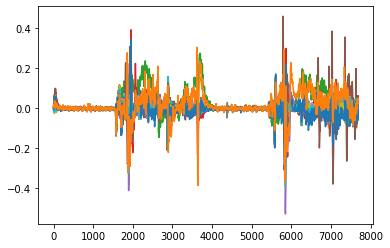

In [3]:
plt.plot(train_set)
plt.show()

In [4]:
def labelize_set(train_set):
    result = list()
    for index, element in enumerate(train_set):
        if (index < 1500 or (index > 3900 and index < 5400)):
            result.append((element, 0))
        else:
            result.append((element, 1))
    return result
    
labelled_set = labelize_set(train_set)
focusedCount = 0
for signals, labels in labelled_set:
    if (labels == 0):
        focusedCount+=1

write_data(labelled_set, "../models/focusdata.csv")

In [5]:
from load_data import load_dataset

dataset = load_dataset("../models/focusdata.csv")

100%|██████████| 500/500 [01:21<00:00,  6.13it/s]


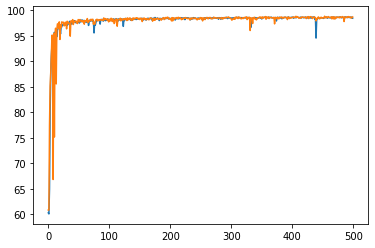

In [9]:
from neuralnetwork import NeuralNetwork

network = NeuralNetwork()

train_set, test_set = pp.split_data(labelled_set)

network, train_accuracies, test_accuracies = train_network(network=network, train_set=train_set, test_set=test_set, epoch=500, learning_rate=0.05, batch_size=64)

plt.plot(train_accuracies)
plt.plot(test_accuracies)

Clearly, there is no reason to go beyond 20 epochs: the model trains very well rather quickly.

In [12]:
train_accuracies[-1]

98.43851470947266

In [13]:
max(train_accuracies)

98.71502685546875

In [ ]:
torch.save(network.state_dict(), "../models/network.pt")